## Meeting with Mike 14/11/2024


##### Added Weighting:
$$\overline{T_L^x} = \dfrac{ \sum_{\phi} T_L^x(\phi) \cdot cos \phi \cdot f_L(\phi)  }{\sum_{\phi} cos \phi \cdot f_L(\phi)}$$

where: 
- $\phi$ - refers to each zonal band
- $f_L(\phi)$ - is the fraction of land within a latitudinal band

Quote from the Methods section: "Percentiles are computed at each latitude individually by aggregating
daily-mean quantities over time and longitude. Before plotting, quantities are
averaged from 20 °S to 20 °N with area weighting. Percentiles over land and ocean
are calculated separately"

##### How I am calculating px
1. Calculating MSE for all days at all grid points over time $h = c_pT + L_vq$; cp = 1004.6; Lv = 2500000
2. Finding the days where temperature over land exceeds the xth percentile - done by lat band
3. On the days where temperature over land exceeds the xth percentile I find the mean of MSE - done by lat band
4. For each lat I take all values of MSE over land and sort them in aescending order and find the rank percentile of the mean MSE for days where temperature exceeds the xth percentile of temperature by using stats.percentileofscore which deals with Nans introduced by the land sea mask
5. This gives values of percentiles of land MSE for every lat and xth percentile of temperature value (MOP)
6. This is weighted by the fraction of land at each latitude and the area of each latitude 



##### Recreating Figure 1 of extended Data:

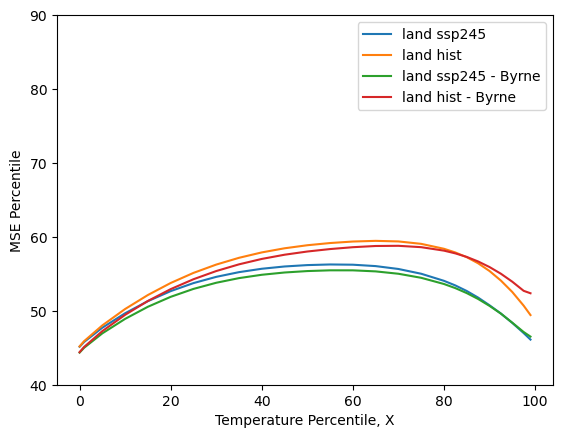

##### Recreating figure 3 of extended Data:
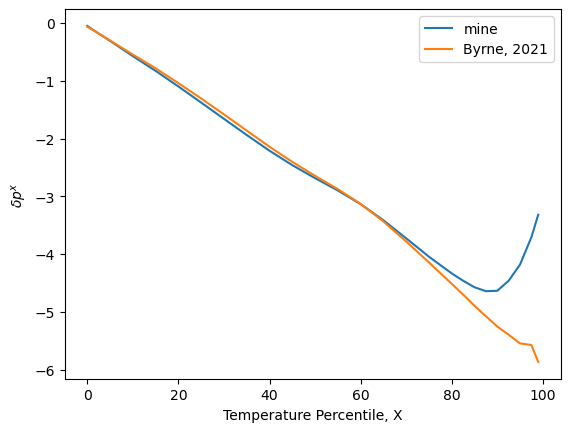

### ISSUES:
SO we obviously have something going wrong with the calculation of px that is substantially changing the character of higher percentiles
- hard to tell but the value for MSE percentile over land at the 0th percentile of temperature is not quite aligned with the one from Mike
- that suggests that even the mean mse distribution is not quite right


From the paper:
where px is defined as the moist static energy percentile **over land** corresponding to the average moist static energy of days exceeding the xth percentile of temperature in the historical simulation (that is, $h_L(p^x) ≡ h^x_L$). 

##### Things I tried

Using all temperatures (land and ocean) but looking at MSE percentile over land:

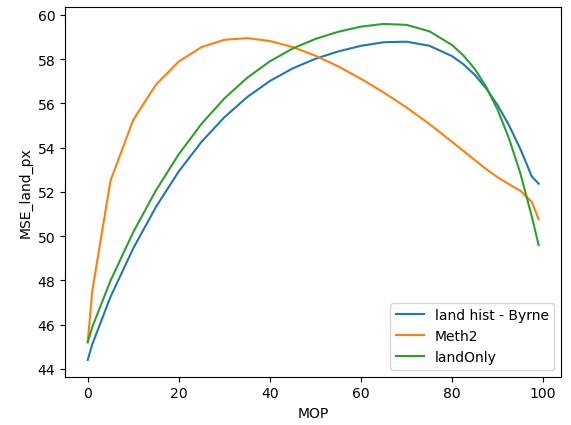

That did not work

---
#### The Plan going foreward:

Should CEDA decide that it wants to play ball...

$ \alpha _L = \dfrac{(\dfrac{\delta q_{L.sat}^x}{q_{L.sat}^x})}{\delta T_L^x}  $      

$ \alpha _O = \dfrac{(\dfrac{\delta q_{O.sat}}{q_{O.sat}})}{\delta T_O} $

$ \alpha _L $ is the clausius clapeyron parameters defining the fractional sensitvities of land saturation specific humidities to a 1 K temperature change

Unlike before we know that O variables are going to be variable across percentile space


$\delta T_L^x = \gamma ^{T_O} \delta T_O$


$\gamma ^{T_O} = \dfrac{(c_p + L_v \alpha_O q_O)}{(c_p + L_v \alpha _L q_L^x)}$


##### Alpha - could cause issue with emergent constrainty-ness of the gamma term

###### Aproximate forms of $\alpha$ parameterts from Held and Soden 2006

$$\alpha(T) = \dfrac{d\ln e_s}{dT} = \dfrac{L}{R_vT^2} \therefore$$

$$\dfrac{1}{e_s} \dfrac{de_s}{dT} = \dfrac{\delta e_s}{e_s} = \dfrac{L}{R_vT^2} \delta T$$

- Here you can get alpha to just be a function of temperature...
- However it wouldn't shift around at all - which might be ok
- Alternativly I think it would be ok to just prescribe the thermodynamic rate? bc its all right around there
- You'll just have to compare results for different ways of doing it...



---
Things to try: different models - use the most updated ones from 2020 - why would they have changed that much? 

---
#### Future steps:
i. How does $\delta T_L^x$ correlation to $\gamma ^{T_O}$ - ie its contribution
    
    Plot this as a function of x - so is it stronger at the higher percentiles or what - also then look at some individual scatter plots

ii. Do a similar thing but with $\dfrac{\delta T_L^x}{\delta T_O}$ vs $\gamma ^{T_O}$ 

    This will likely be better correlated but also gotta plot the correlation as a function of xth percentile

iii. And the final idea is to instead of doing this as a function of latitude, do it at every gridpoint - calculating a gamma value at every gridpoint and then figuring out how correlated it is

    You might have to get creative here and interpolate to a set grid in order to find the correlation across grid point bc youd be wanting to get multiple observations for a single grid point but theyd have to align
    